In [1]:
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot
from pandas import DataFrame
from numpy import log

In [5]:
df_southwest = pd.read_excel(r'/Users/dilianaserafimova/Desktop/Southwest.xlsx')

In [6]:
df_southwest.head()

,Year,Month,date,flight_domestic,flight_int,pax_count,revenue,seat_miles,load_factor,flights
0,2002,10,2002 10,"6,063,128",NaN,"6,063,128","3,754,364","6,006,555",62.50,"81,876"
1,2002,11,2002 11,"5,598,102",NaN,"5,598,102","3,439,403","5,681,559",60.54,"76,818"
2,2002,12,2002 12,"6,104,562",NaN,"6,104,562","3,891,291","5,899,788",65.96,"79,481"
3,2002,TOTAL,2002 TOTAL,"72,447,995",0,"72,447,995","45,397,266","68,909,312",65.88,"947,49"
4,2003,1,2003 1,"5,484,294",NaN,"5,484,294","3,474,326","5,991,225",57.99,"80,62"


## Delete irrelevant data / years / months 

#### Delete irrelevant date

In [7]:
indexNames = df_southwest[df_southwest['Year'] == 2002].index
df_southwest.drop(indexNames , inplace=True)


In [8]:
indexNames = df_southwest[df_southwest['Year'] == 2020].index
df_southwest.drop(indexNames , inplace=True)

In [9]:
indexNames = df_southwest[df_southwest['Year'] == 2021].index
df_southwest.drop(indexNames , inplace=True)

In [10]:
indexNames = df_southwest[df_southwest['Year'] == 2022].index
df_southwest.drop(indexNames , inplace=True)

In [11]:
print(df_southwest)

     Year  Month        date flight_domestic flight_int    pax_count  \
4    2003      1      2003 1       5,484,294        NaN    5,484,294   
5    2003      2      2003 2       5,357,402        NaN    5,357,402   
6    2003      3      2003 3       6,327,876        NaN    6,327,876   
7    2003      4      2003 4       6,133,270        NaN    6,133,270   
8    2003      5      2003 5       6,537,711        NaN    6,537,711   
..    ...    ...         ...             ...        ...          ...   
220  2019      9      2019 9      12,394,694    203.532   12,598,226   
221  2019     10     2019 10      13,752,707     255.69   14,008,397   
222  2019     11     2019 11      12,697,679    355.189   13,052,868   
223  2019     12     2019 12      13,741,387     398.67   14,140,057   
224  2019  TOTAL  2019 TOTAL     158,418,529  4,262,482  162,681,011   

         revenue   seat_miles load_factor    flights  
4      3,474,326    5,991,225       57.99      80,62  
5      3,363,428    5,382

#### Delete irrelevant content

In [12]:
indexNames = df_southwest[df_southwest['Month'] == 'TOTAL'].index
df_southwest.drop(indexNames , inplace=True)

In [13]:
df_southwest.head(20)

,Year,Month,date,flight_domestic,flight_int,pax_count,revenue,seat_miles,load_factor,flights
4,2003,1,2003 1,"5,484,294",NaN,"5,484,294","3,474,326","5,991,225",57.99,"80,62"
5,2003,2,2003 2,"5,357,402",NaN,"5,357,402","3,363,428","5,382,904",62.48,"72,108"
6,2003,3,2003 3,"6,327,876",NaN,"6,327,876","4,059,191","6,027,126",67.35,"80,362"
7,2003,4,2003 4,"6,133,270",NaN,"6,133,270","3,935,024","5,909,157",66.59,"78,676"
8,2003,5,2003 5,"6,537,711",NaN,"6,537,711","4,189,524","6,050,221",69.25,"79,998"
9,2003,6,2003 6,"6,775,552",NaN,"6,775,552","4,427,485","5,937,934",74.56,"78,862"
10,2003,7,2003 7,"7,132,410",NaN,"7,132,410","4,750,318","6,127,338",77.53,"81,282"
11,2003,8,2003 8,"6,833,522",NaN,"6,833,522","4,480,716","6,119,325",73.22,"80,94"
12,2003,9,2003 9,"5,742,239",NaN,"5,742,239","3,602,650","5,960,957",60.44,"78,702"
13,2003,10,2003 10,"6,274,120",NaN,"6,274,120","3,968,193","6,238,401",63.61,"81,97"


#### Delete irrelevant column

In [14]:
df_southwest = df_southwest.drop(["flight_domestic", "flight_int", 'Year', 'Month'], axis=1)

#### Delete NaN

In [15]:
incomplete_columns = list(df_southwest.columns[df_southwest.isnull().any()])

In [16]:
incomplete_columns

[]

#### Datensatz ist vollständig

## Convert argument to datetime

In [17]:
df_southwest['date'] = pd.to_datetime(df_southwest['date'])

In [18]:
df_southwest.head()

,date,pax_count,revenue,seat_miles,load_factor,flights
4,2003-01-01,"5,484,294","3,474,326","5,991,225",57.99,"80,62"
5,2003-02-01,"5,357,402","3,363,428","5,382,904",62.48,"72,108"
6,2003-03-01,"6,327,876","4,059,191","6,027,126",67.35,"80,362"
7,2003-04-01,"6,133,270","3,935,024","5,909,157",66.59,"78,676"
8,2003-05-01,"6,537,711","4,189,524","6,050,221",69.25,"79,998"


## Convert data types

In [19]:
df_southwest.dtypes

date           datetime64[ns]
pax_count              object
revenue                object
seat_miles             object
load_factor            object
flights                object
dtype: object

In [20]:
df_southwest['pax_count'] = df_southwest['pax_count'].str.replace('[^\w\s]','').astype(int)

/var/folders/_h/_0hrsyw93ljbt2ws9kq8w6z40000gn/T/ipykernel_2700/1660583784.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_southwest['pax_count'] = df_southwest['pax_count'].str.replace('[^\w\s]','').astype(int)


In [21]:
df_southwest['revenue'] = df_southwest['revenue'].str.replace('[^\w\s]','').astype(int)

/var/folders/_h/_0hrsyw93ljbt2ws9kq8w6z40000gn/T/ipykernel_2700/2445603854.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_southwest['revenue'] = df_southwest['revenue'].str.replace('[^\w\s]','').astype(int)


In [22]:
df_southwest['seat_miles'] = df_southwest['seat_miles'].str.replace('[^\w\s]','').astype(int)

/var/folders/_h/_0hrsyw93ljbt2ws9kq8w6z40000gn/T/ipykernel_2700/2593201998.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_southwest['seat_miles'] = df_southwest['seat_miles'].str.replace('[^\w\s]','').astype(int)


In [23]:
df_southwest['flights'] = df_southwest['flights'].str.replace('[^\w\s]','').astype(int)

/var/folders/_h/_0hrsyw93ljbt2ws9kq8w6z40000gn/T/ipykernel_2700/478338512.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_southwest['flights'] = df_southwest['flights'].str.replace('[^\w\s]','').astype(int)


In [24]:
df_southwest['load_factor']= df_southwest['load_factor'].astype(float)

In [25]:
df_southwest.head()

,date,pax_count,revenue,seat_miles,load_factor,flights
4,2003-01-01,5484294,3474326,5991225,57.99,8062
5,2003-02-01,5357402,3363428,5382904,62.48,72108
6,2003-03-01,6327876,4059191,6027126,67.35,80362
7,2003-04-01,6133270,3935024,5909157,66.59,78676
8,2003-05-01,6537711,4189524,6050221,69.25,79998


In [26]:
df_southwest.dtypes

date           datetime64[ns]
pax_count               int64
revenue                 int64
seat_miles              int64
load_factor           float64
flights                 int64
dtype: object

## Date to Index

In [27]:
df_southwest = df_southwest.set_index(['date'])

## Clean data safe

In [28]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Clean_Data/Southwest

/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Clean_Data/Southwest


In [32]:
df_southwest.to_excel('df_southwest_clean.xlsx', index = True)

## Generating rolling means and standard deviations

### Rolling mean

In [33]:
df_southwest['pax_count_rolling_mean'] = df_southwest['pax_count'].rolling(12).mean()

### Rolling std

In [34]:
df_southwest['pax_count_rolling_std'] = df_southwest['pax_count'].rolling(12).std()

### Plot

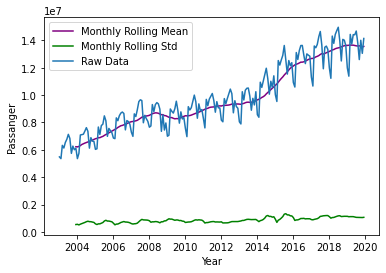

In [35]:
plt.plot(df_southwest['pax_count_rolling_mean'], label = 'Monthly Rolling Mean', color = 'purple')
plt.plot(df_southwest['pax_count_rolling_std'], label = 'Monthly Rolling Std', color = 'green')
plt.plot(df_southwest['pax_count'], label='Raw Data')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Passanger')
plt.show()

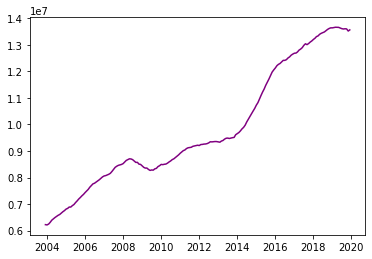

In [36]:
plt.plot(df_southwest['pax_count_rolling_mean'], label = 'Monthly Rolling Mean', color = 'purple')

## Seasonal decompose

In [37]:
result=seasonal_decompose(df_southwest['pax_count'], model='multiplicable', period=12)

<AxesSubplot:xlabel='date'>

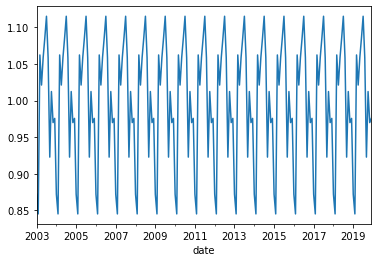

In [38]:
result.seasonal.plot()

<AxesSubplot:xlabel='date'>

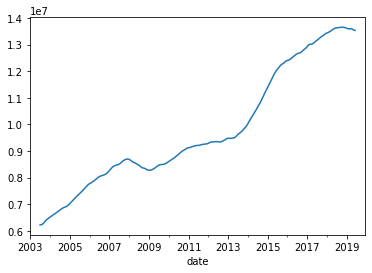

In [39]:
result.trend.plot()

<AxesSubplot:xlabel='date'>

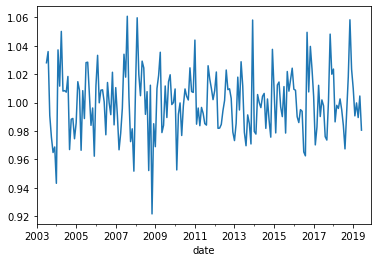

In [40]:
result.resid.plot()

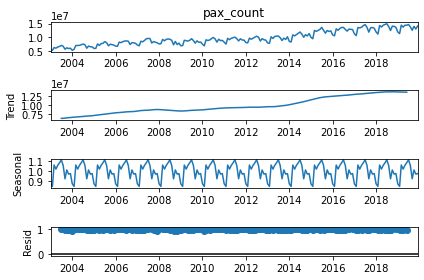

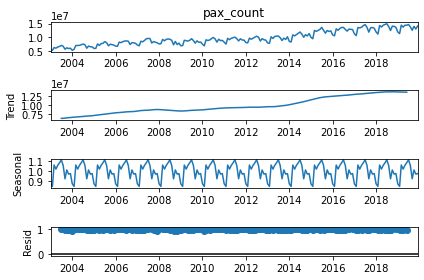

In [41]:
result.plot()